Shape of x_train: (3823, 8, 8, 1)
Shape of x_test: (1797, 8, 8, 1)
Visualize Sample Digit Images


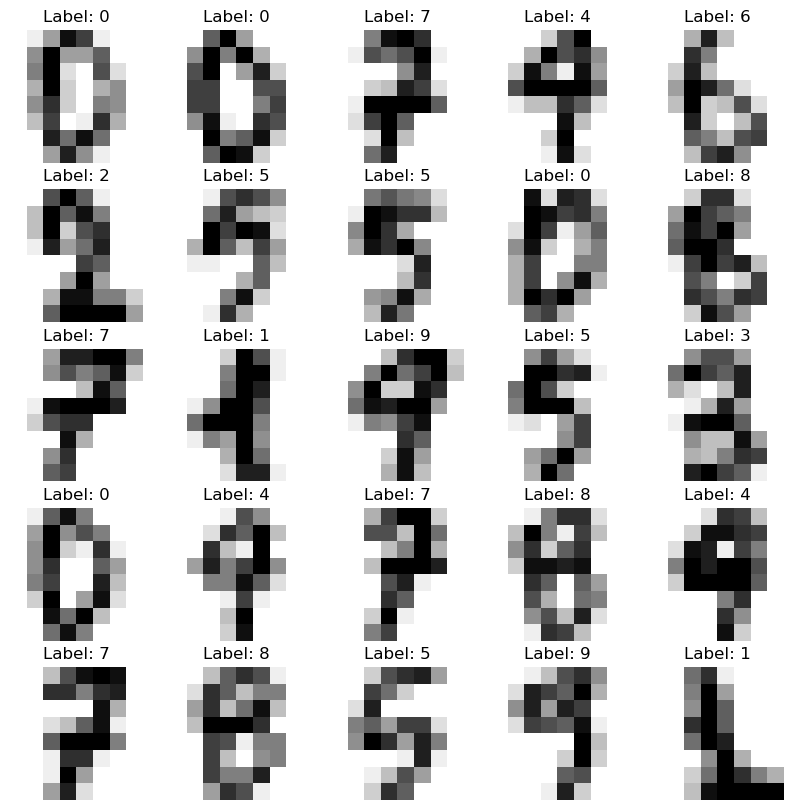

/Users/chinthaharikareddy/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 32)       │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 2, 2, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,842 (284.54 KB)

 Trainable params: 72,842 (284.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3713 - loss: 2.0554 - val_accuracy: 0.8458 - val_loss: 0.5928
Epoch 2/3
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8752 - loss: 0.4446 - val_accuracy: 0.9229 - val_loss: 0.2734
Epoch 3/3
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9448 - loss: 0.1872 - val_accuracy: 0.9569 - val_loss: 0.1771
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.9348 - loss: 0.2375
Test Loss: 0.22567464411258698
Test Accuracy: 0.9293266534805298


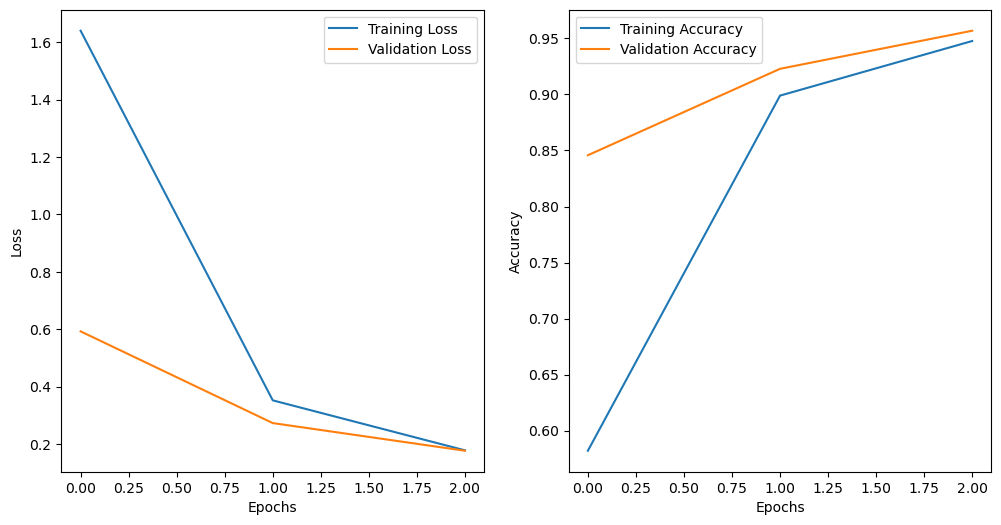

Epoch 1/2
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9536 - loss: 0.1528 - val_accuracy: 0.9464 - val_loss: 0.1540
Epoch 2/2
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9693 - loss: 0.1083 - val_accuracy: 0.9608 - val_loss: 0.1349
Epoch 1/2
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9738 - loss: 0.0927 - val_accuracy: 0.9739 - val_loss: 0.0813
Epoch 2/2
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9739 - loss: 0.0783 - val_accuracy: 0.9752 - val_loss: 0.0893
Epoch 1/2
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9835 - loss: 0.0637 - val_accuracy: 0.9856 - val_loss: 0.0502
Epoch 2/2
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9842 - loss: 0.0590 - val_accuracy: 0.9895 - val_loss: 0.0373
Epoch 1/2
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9803 - loss: 0.0612 - val_accuracy: 0.9935 - val_loss: 0.0353
Epoch 2/2
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9871 - loss: 0.0442 - val_accuracy: 0.9856 - val_loss: 0.0580


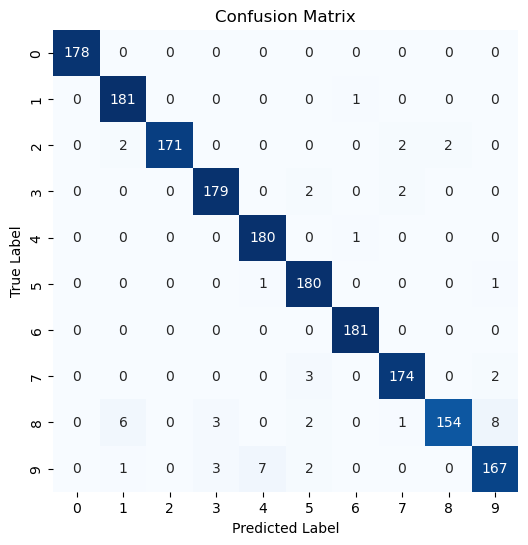

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

# Step 1: Data Preparation
# Load and preprocess the data
def load_data(filepath):
    data = np.loadtxt(filepath, delimiter=',', dtype='int')
    X, y = data[:, :-1], data[:, -1]
    X = X.reshape(-1, 8, 8, 1)  # Reshape data
    return X / 16.0, y  # Normalize data

# Define dataset path
dataset_path = '/Users/chinthaharikareddy/Downloads/optical+recognition+of+handwritten+digits/'
x_train, y_train = load_data(dataset_path + 'optdigits.tra')
x_test, y_test = load_data(dataset_path + 'optdigits.tes')

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Print the shape of loaded data
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)

# Visualize Sample Digit Images
print("Visualize Sample Digit Images")
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i].reshape(8, 8), cmap='binary')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis('off')
plt.show()

# Step 2: Convolutional Neural Network Architecture
# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(8, 8, 1)),
    layers.MaxPooling2D((2, 2)),  # Step 3: Max Pooling
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),  # Step 3: Max Pooling
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Flatten(),  # Step 4: Flattening
    layers.Dense(64, activation='relu'),  # Step 4: Fully Connected Layer
    layers.Dense(10, activation='softmax')  # Step 4: Softmax Layer
])

# Print model summary to document layer parameters and dimensions
model.summary()

# Plot the CNN architecture
plot_model(model, to_file='cnn_architecture.png', show_shapes=True)

# Analysis for the effect of max pooling on feature maps
"""
Max pooling reduces the spatial dimensions of the feature maps while retaining the most important 
information. This helps in reducing computation and controlling overfitting by enforcing spatial 
hierarchies in the data.
"""

# Description of the flattening process and connection to fully connected layers
"""
The flattening layer converts the 3D feature maps to a 1D vector, which is then connected to the 
fully connected layers. This process allows the convolutional layers to extract spatial features, 
and the fully connected layers to perform classification.
"""

# Step 5: Training and Evaluation
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with fewer epochs
history = model.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Plot the loss and accuracy over epochs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# K-Fold Cross Validation and Confusion Matrix Analysis
kf = KFold(n_splits=5, shuffle=True)
fold = 1
for train_index, test_index in kf.split(x_train):
    x_train_fold, x_val_fold = x_train[train_index], x_train[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]
    model.fit(x_train_fold, y_train_fold, epochs=2, batch_size=64, validation_data=(x_val_fold, y_val_fold))
    fold += 1

# Analyze confusion matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
